In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [195]:
# Load the data
data = pd.read_csv('Anime.csv')
print(data.head())

#store the number of rows in the data
num_rows = data.shape[0]


   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [196]:
##Data Cleaning

#giving each studio a unique id number and add it to the data
studios = data['Studio'].unique()
studio_ids = range(1, len(studios) + 1)
studio_dict = dict(zip(studios, studio_ids))
data['Studio_ID'] = data['Studio'].map(studio_dict)
print(data.head())

#Removing unwanted data columns
data = data.drop('End_year', axis=1)
data = data.drop('staff', axis=1)
data = data.drop('Voice_actors', axis=1)
data = data.drop('Description', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Japanese_name', axis=1)
data = data.drop('Type', axis=1)
data = data.drop('Tags', axis=1)
data = data.drop('Related_Mange', axis=1)
data = data.drop('Related_anime', axis=1)
data = data.drop('Rank', axis=1)
data = data.drop('Release_season', axis=1)
data = data.drop('Release_year', axis=1)
data = data.drop('Studio', axis=1)
data = data.drop('Content_Warning', axis=1)

#remove rows that have studios with less than 10 shows
#print the names of the columns in the data
print(data.columns)

#Remove the rows with missing values
data = data.dropna()

#store and print the number of rows after removing the missing values
num_rows_cleaned = data.shape[0]
print(num_rows_cleaned)

print("=====================")

##Indexing

#Give every show a unique id number
data['ID'] = range(1, num_rows_cleaned + 1)
print(data.head())

#create a csv file that contains the shows and the studios that produced them
data[['ID', 'Studio_ID']].to_csv('show_studio.csv', index=False)

#print the maximum studio id
max_studio_id = data['Studio_ID'].max()

print("Number of studios: ",max_studio_id)

#Drop ID column
data = data.drop('ID', axis=1)


   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

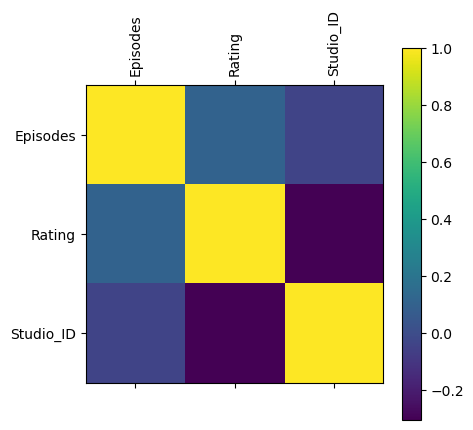

In [197]:
# Convert string values to numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Plot the correlation matrix
correlation_matrix = data.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

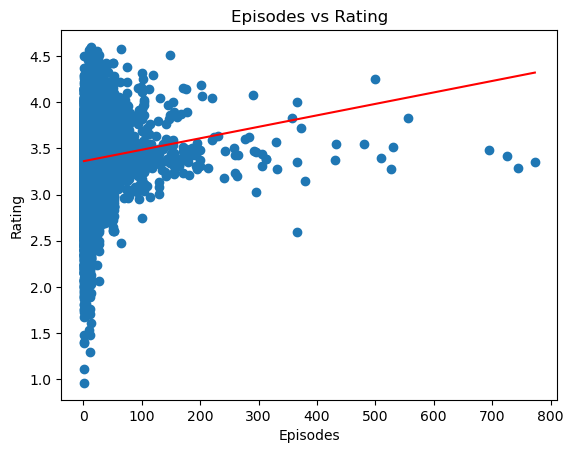

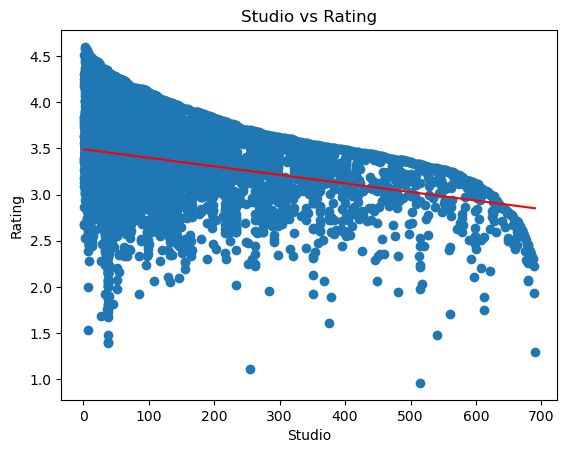

In [198]:
##Multivariate Analysis

# Plot the data
plt.title('Episodes vs Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.scatter(data['Episodes'], data['Rating'])
plt.plot(np.unique(data['Episodes']), np.poly1d(np.polyfit(data['Episodes'], data['Rating'], 1))(np.unique(data['Episodes'])), color='red')
plt.show()

plt.title('Studio vs Rating')
plt.xlabel('Studio')
plt.ylabel('Rating')
plt.scatter(data['Studio_ID'], data['Rating'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Rating'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()


In [199]:
corr = pearsonr(data['Episodes'], data['Rating'])
print('Episodes vs Rating:', corr)

Episodes vs Rating: PearsonRResult(statistic=0.10614412136076538, pvalue=4.0514544817936743e-22)


In [200]:
corr = pearsonr(data['Studio_ID'], data['Rating'])
print('Studio vs Rating:', corr)

Studio vs Rating: PearsonRResult(statistic=-0.3042830968567817, pvalue=2.1866168769370806e-176)


In [201]:
model = LinearRegression().fit(data[['Episodes']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Episodes']], data['Rating'])
r_sq = model.score(data[['Episodes']], data['Rating'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.01126657449944879


In [202]:
model = LinearRegression().fit(data[['Studio_ID']], data['Rating'])
Rating = np.array([Ratings for Ratings in range(0, 100)]).reshape(-1, 1)
model.fit(data[['Studio_ID']], data['Rating'])
r_sq = model.score(data[['Studio_ID']], data['Rating'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.09258820303275384


In [203]:
episodes = data['Episodes']
episodes = sm.add_constant(episodes)
model = sm.OLS(data['Rating'], episodes).fit()
print(model.summary())
print(model.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     94.04
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.05e-22
Time:                        10:58:46   Log-Likelihood:                -4471.1
No. Observations:                8255   AIC:                             8946.
Df Residuals:                    8253   BIC:                             8960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3617      0.005    645.307      0.0

In [204]:
studio_id = data['Studio_ID']
studio_id = sm.add_constant(studio_id)
model = sm.OLS(data['Rating'], studio_id).fit()
print(model.summary())
print(model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     842.1
Date:                Sat, 04 May 2024   Prob (F-statistic):          2.19e-176
Time:                        10:58:46   Log-Likelihood:                -4116.8
No. Observations:                8255   AIC:                             8238.
Df Residuals:                    8253   BIC:                             8252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4918      0.006    611.949      0.0

In [205]:
data = list(zip(data['Rating'], data['Episodes'], data['Studio_ID']))
print(data)

[(4.6, 13.0, 2), (4.58, 12.0, 3), (4.58, 64.0, 4), (4.57, 10.0, 5), (4.56, 24.0, 6), (4.55, 16.0, 6), (4.53, 10.0, 7), (4.51, 25.0, 7), (4.51, 26.0, 1), (4.51, 148.0, 9), (4.5, 12.0, 7), (4.5, 1.0, 11), (4.48, 12.0, 12), (4.48, 11.0, 13), (4.47, 25.0, 14), (4.46, 8.0, 3), (4.46, 11.0, 16), (4.46, 13.0, 4), (4.46, 13.0, 7), (4.45, 25.0, 17), (4.45, 12.0, 18), (4.45, 12.0, 12), (4.45, 11.0, 11), (4.45, 12.0, 20), (4.44, 14.0, 15), (4.44, 24.0, 10), (4.44, 15.0, 3), (4.44, 13.0, 14), (4.44, 24.0, 6), (4.44, 16.0, 21), (4.44, 12.0, 15), (4.44, 12.0, 15), (4.44, 12.0, 5), (4.44, 24.0, 22), (4.43, 25.0, 7), (4.43, 51.0, 14), (4.43, 12.0, 9), (4.43, 51.0, 15), (4.43, 11.0, 23), (4.43, 39.0, 24), (4.42, 12.0, 24), (4.42, 24.0, 5), (4.4, 13.0, 25), (4.4, 25.0, 13), (4.4, 11.0, 23), (4.4, 25.0, 4), (4.39, 13.0, 10), (4.39, 24.0, 12), (4.39, 25.0, 4), (4.38, 12.0, 4), (4.38, 75.0, 9), (4.38, 25.0, 14), (4.37, 24.0, 24), (4.37, 2.0, 27), (4.37, 39.0, 24), (4.37, 4.0, 2), (4.37, 26.0, 9), (4.37, 10

In [206]:
data = pd.DataFrame(data, columns=['Rating', 'Episodes', 'Studio_ID'])
model = sm.OLS(data['Rating'], data).fit()
print(model.summary())
print(model.scale**0.5)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.785e+31
Date:                Sat, 04 May 2024   Prob (F-statistic):                        0.00
Time:                        10:58:46   Log-Likelihood:                      2.4558e+05
No. Observations:                8255   AIC:                                 -4.912e+05
Df Residuals:                    8252   BIC:                                 -4.911e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------